In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ushape.csv to ushape.csv


In [3]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


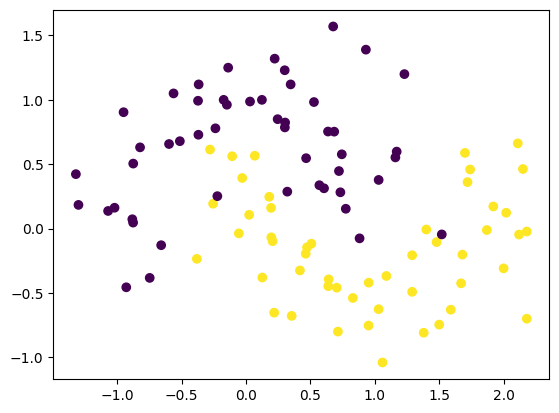

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.get_weights()

[array([[-0.10935318, -0.29713982,  0.24581927,  0.44100004,  0.14153385,
         -0.58758575,  0.5230661 , -0.65930146, -0.3565969 , -0.55750346],
        [-0.41858697, -0.5566921 , -0.50657004, -0.16970241,  0.31450993,
          0.1500591 , -0.10097224, -0.15417635, -0.4671784 ,  0.6636295 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.04547137],
        [ 0.49558443],
        [-0.55230176],
        [ 0.46086198],
        [ 0.39458245],
        [ 0.41424447],
        [-0.40695235],
        [ 0.21280605],
        [-0.15941268],
        [ 0.44834036]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
model.get_weights()[0].shape

(2, 10)

In [16]:
initial_weights = model.get_weights()

In [17]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [18]:
model.set_weights(initial_weights)

In [19]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [22]:
model.get_weights()

[array([[ 0.43885204,  0.43885204,  0.43885204,  0.43885204,  0.43885204,
          0.43885204,  0.43885204,  0.43885204,  0.43885204,  0.43885204],
        [-0.4800723 , -0.4800723 , -0.4800723 , -0.4800723 , -0.4800723 ,
         -0.4800723 , -0.4800723 , -0.4800723 , -0.4800723 , -0.4800723 ]],
       dtype=float32),
 array([-0.14047612, -0.14047612, -0.14047612, -0.14047612, -0.14047612,
        -0.14047612, -0.14047612, -0.14047612, -0.14047612, -0.14047612],
       dtype=float32),
 array([[0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474],
        [0.0545474]], dtype=float32),
 array([-0.05679544], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

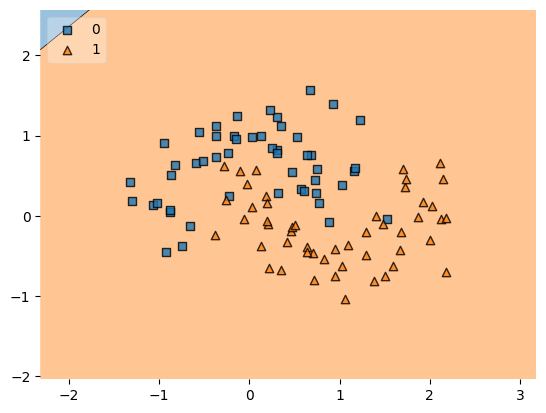

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)